<a href="https://colab.research.google.com/github/MustakAA/Data-Visualization-Matplotlib-and-Python/blob/main/Section_5_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
url = "https://raw.githubusercontent.com/MustakAA/Data-Visualization-Matplotlib-and-Python/main/datasets/setosa-versicolor.csv"

In [4]:
df = pd.read_csv (url)
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Regplot

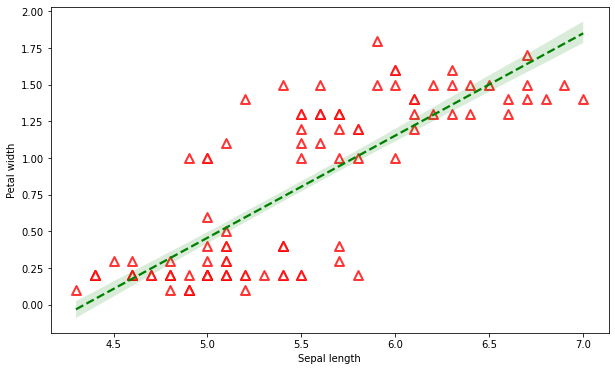

In [5]:
fig, ax = plt.subplots(figsize = (10,6))
sns.regplot('Sepal length','Petal width', data = df,
            ax = ax, scatter = True, fit_reg = True,
            marker = '^', scatter_kws = dict(edgecolor = 'red', lw = 2, facecolor = 'white', s = 80),
            line_kws = dict(color = 'green', linestyle = 'dashed'),
            ci = 68)

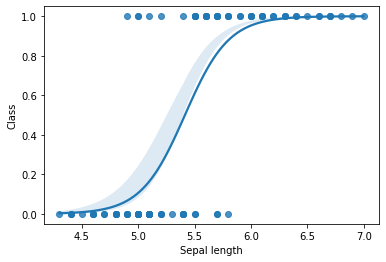

In [6]:


sns.regplot('Sepal length','Class', data = df, logistic = True, n_boot = 5)

# Countplot

In [7]:
url = "https://raw.githubusercontent.com/MustakAA/Data-Visualization-Matplotlib-and-Python/main/datasets/titanic.csv"
df = pd.read_csv(url)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


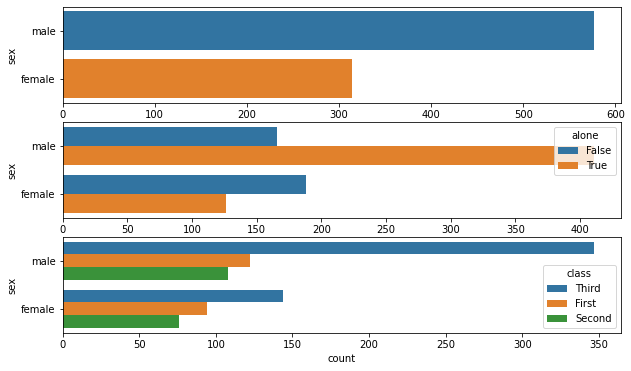

In [8]:
fig, ax = plt.subplots(3, figsize = (10,6))
sns.countplot(y ='sex', data = df, ax = ax[0])
sns.countplot(y ='sex', data = df, ax = ax[1], hue = 'alone')
sns.countplot(y ='sex', data = df, ax = ax[2], hue = 'class')

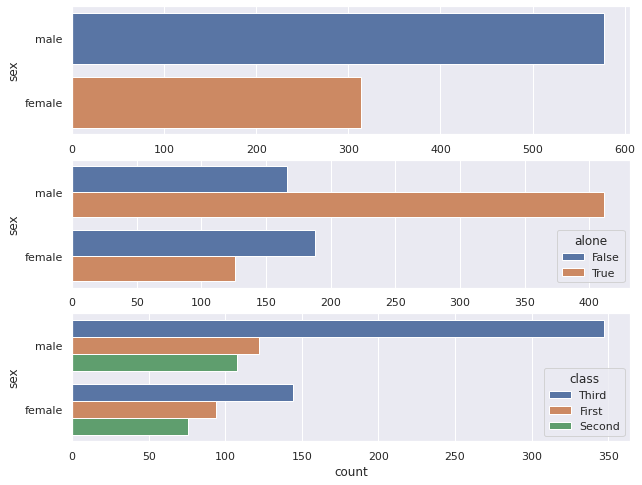

In [9]:
sns.set(style = 'darkgrid')
fig, ax = plt.subplots(3, figsize = (10,8))
sns.countplot(y ='sex', data = df, ax = ax[0])
sns.countplot(y ='sex', data = df, ax = ax[1], hue = 'alone')
sns.countplot(y ='sex', data = df, ax = ax[2], hue = 'class')

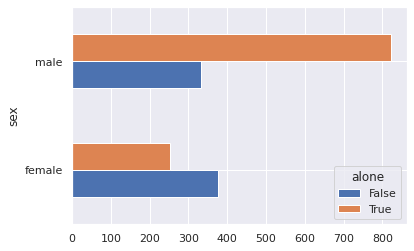

In [10]:
fig, ax = plt.subplots()
df2 = df[['alone', 'sex']].groupby(['sex', 'alone']).agg(np.size).unstack()
df2.plot.barh(rot = 0, ax = ax)

In [11]:
# for more info 
help(sns.countplot)

Help on function countplot in module seaborn.categorical:

countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
    Show the counts of observations in each categorical bin using bars.
    
    A count plot can be thought of as a histogram across a categorical, instead
    of quantitative, variable. The basic API and options are identical to those
    for :func:`barplot`, so you can compare counts across nested variables.
    
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
    - A "long-form" DataFrame, in which case the ``x``, ``y``, and ``hue``
      variables will determine how the data are plotted.
    - A "wide-form" DataFrame, such that each numeric column will be plotted.
    - An array or li

# Barplot

In [12]:
url = "https://raw.githubusercontent.com/MustakAA/Data-Visualization-Matplotlib-and-Python/main/datasets/tips.csv"
df = pd.read_csv(url)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0.5, 1.0, 'Most contributing bill ranges')

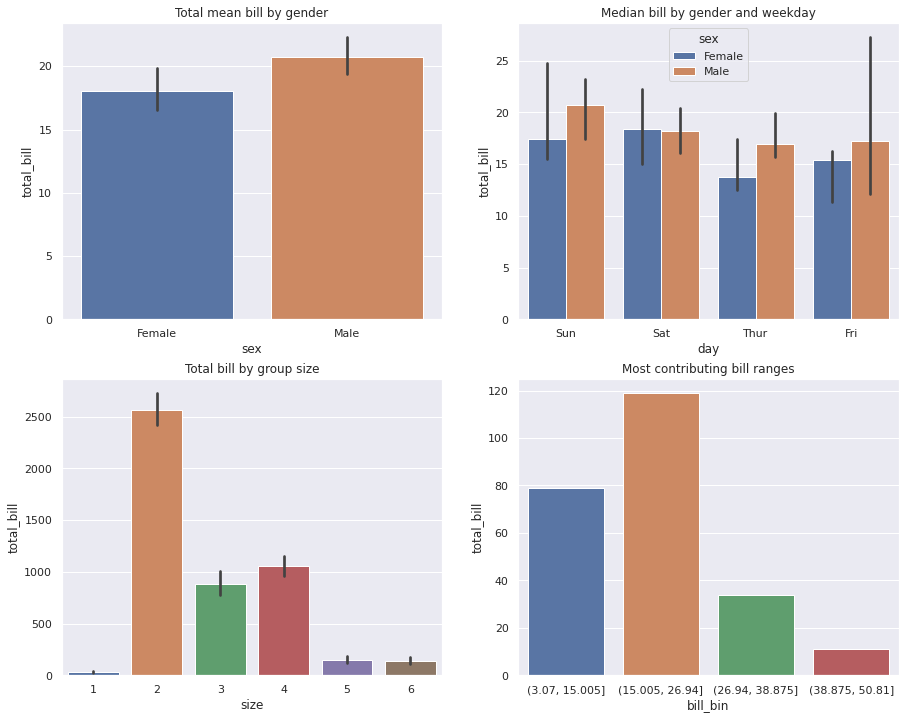

In [13]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 12))
sns.barplot(x = 'sex', y = 'total_bill', data = df, ax = ax[0, 0], estimator = np.mean)
ax[0,0].set_title('Total mean bill by gender')

sns.barplot(x = 'day', y = 'total_bill', data = df, ax = ax[0, 1], hue = 'sex', estimator = np.median)
ax[0,1].set_title('Median bill by gender and weekday')

sns.barplot(x = 'size', y = 'total_bill', data = df, ax = ax[1, 0], estimator = np.sum)
ax[1,0].set_title('Total bill by group size')

mi = df.total_bill.min()
ma = df.total_bill.max()
bins = np.linspace(mi, ma, 5)
df['bill_bin'] = pd.cut(df.total_bill, bins).astype('category')
sns.barplot(x = 'bill_bin', y = 'total_bill', data = df, ax = ax[1, 1], estimator = np.size)
ax[1,1].set_title('Most contributing bill ranges')

# Boxplot

In [14]:
url = "https://raw.githubusercontent.com/MustakAA/Data-Visualization-Matplotlib-and-Python/main/datasets/tips.csv"
df = pd.read_csv(url)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0.5, 1.0, 'Total bill based on days')

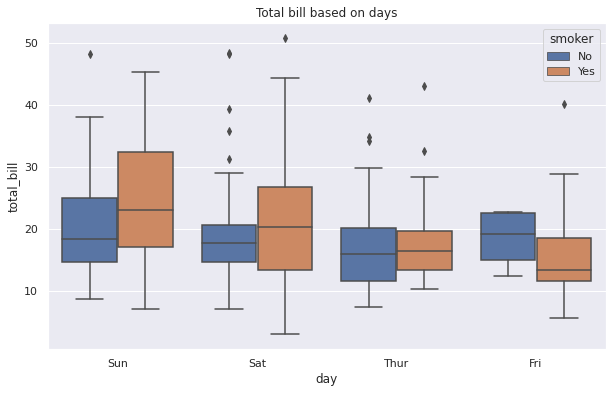

In [18]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x = 'day', y = 'total_bill', data = df, ax = ax, hue = 'smoker')
ax.set_title('Total bill based on days')

# Violinplot and Swarmplot

Text(0.5, 1.0, 'Total bill based on days')

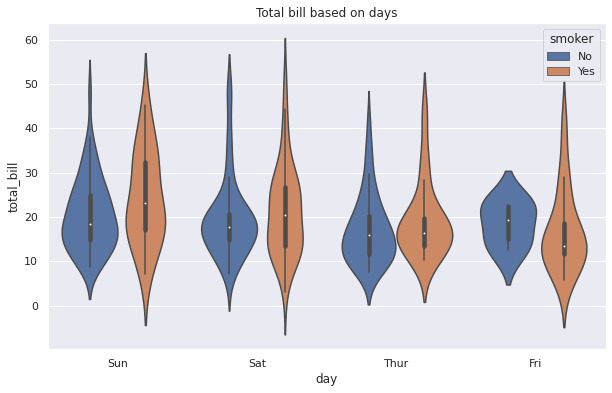

In [20]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.violinplot(x = 'day', y = 'total_bill', data = df, ax = ax, hue = 'smoker', dodge = True)
ax.set_title('Total bill based on days')

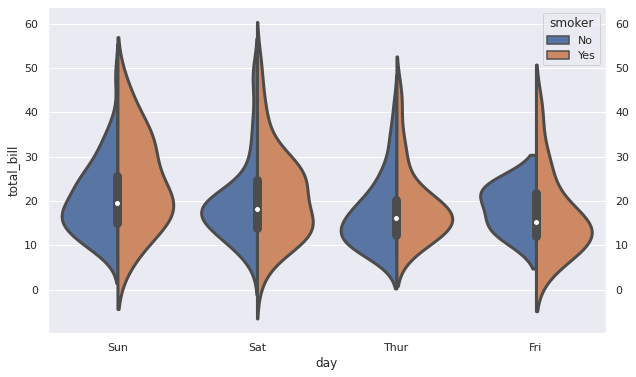

In [21]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.violinplot(x = 'day', y = 'total_bill', data = df, ax = ax, 
               hue = 'smoker', dodge = True,
               linewidth = 3,
               scale = 'width',
               inner= 'box',
               split = True)
ax.tick_params(labelright = True)

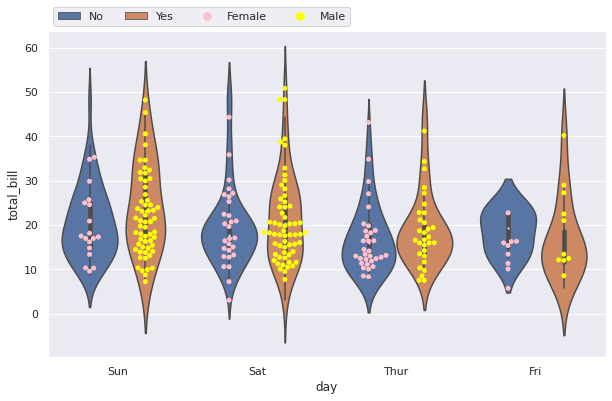

In [26]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.violinplot(x = 'day', y = 'total_bill', data = df, ax = ax, hue = 'smoker', dodge = True)
sns.swarmplot(x = 'day', y = 'total_bill', data = df, ax = ax, hue = 'sex', dodge = True, palette = dict(Female = 'pink', Male = 'yellow'))
ax.legend(ncol = 4, loc = 'lower left', bbox_to_anchor = [0, 1])

# Factorplot

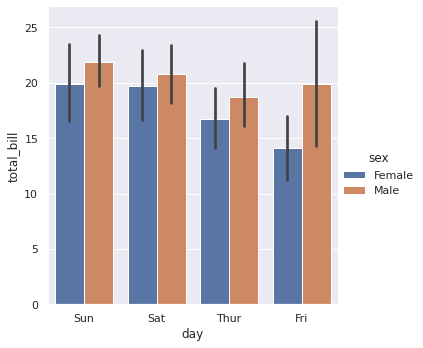

In [31]:
sns.factorplot(x = 'day', y = 'total_bill', data = df, hue = 'sex', kind = 'bar')
fig = plt.gcf()
fig.axes

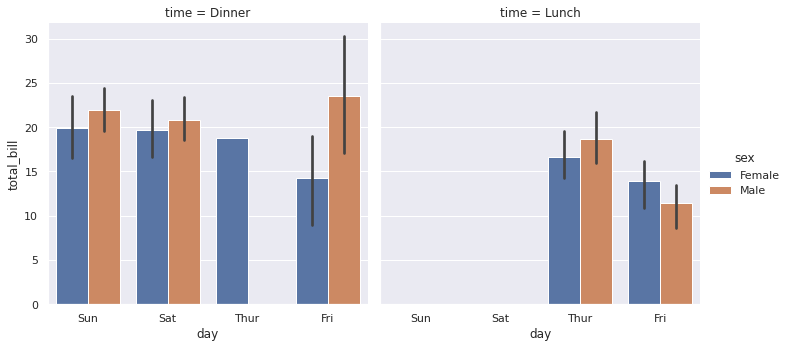

In [32]:
g = sns.factorplot(x = 'day', y = 'total_bill', data = df, hue = 'sex', kind = 'bar', col = 'time')

In [ ]:
# For more details
help(sns.factorplot)

# Distplot

In [33]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


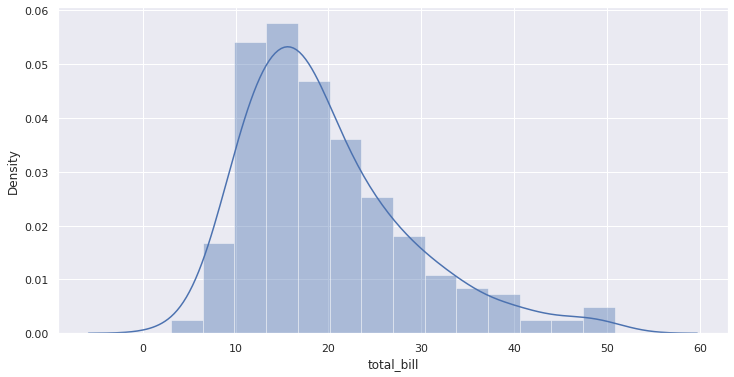

In [34]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.distplot(df.total_bill, ax= ax)

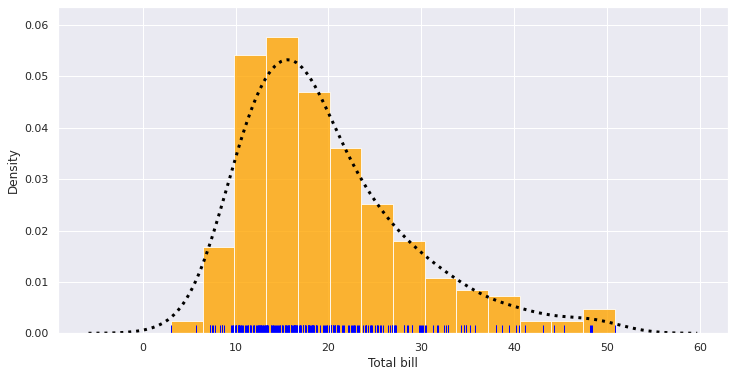

In [35]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.distplot(df.total_bill, 
             ax= ax, hist = True,
             rug = True, axlabel = 'Total bill',
             norm_hist = True,
             kde_kws = dict(color = 'black', linewidth = 3, linestyle = 'dotted'),
             hist_kws = dict(color = 'orange', alpha = 0.8),
             rug_kws = dict(color = 'blue'))

# Jointplot

In [36]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


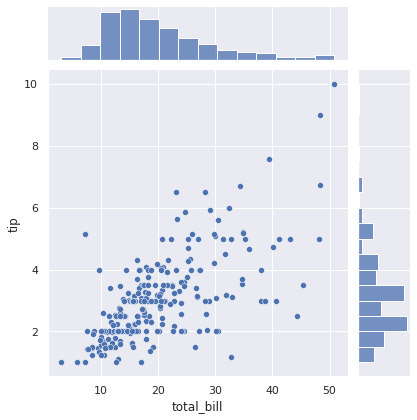

In [37]:
f = sns.jointplot('total_bill', 'tip', data = df)
fig = plt.gcf()

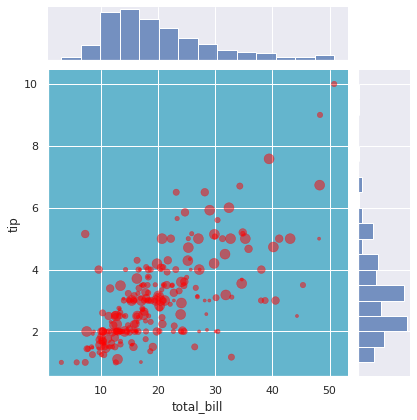

In [41]:
ax1 = fig.axes[0]
ax1.set_facecolor('c')
ax1.collections[0].set(color = 'red', sizes = [10,20,30,40,60,100], alpha = 0.5)
fig

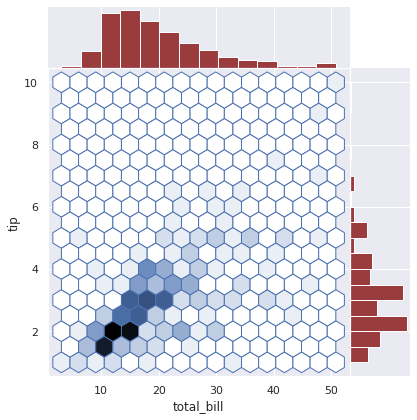

In [48]:
g = sns.jointplot('total_bill', 'tip', data =df,
                  kind = 'hex',
                  space = 0,
                  joint_kws = dict(color = 'b'),
                  marginal_kws = dict(color = 'maroon'))

# Pairplot

In [49]:
url = "https://raw.githubusercontent.com/MustakAA/Data-Visualization-Matplotlib-and-Python/main/datasets/iris.csv"
df = pd.read_csv(url)

In [53]:
df.drop('Class', axis = 1, inplace = True)
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Type
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


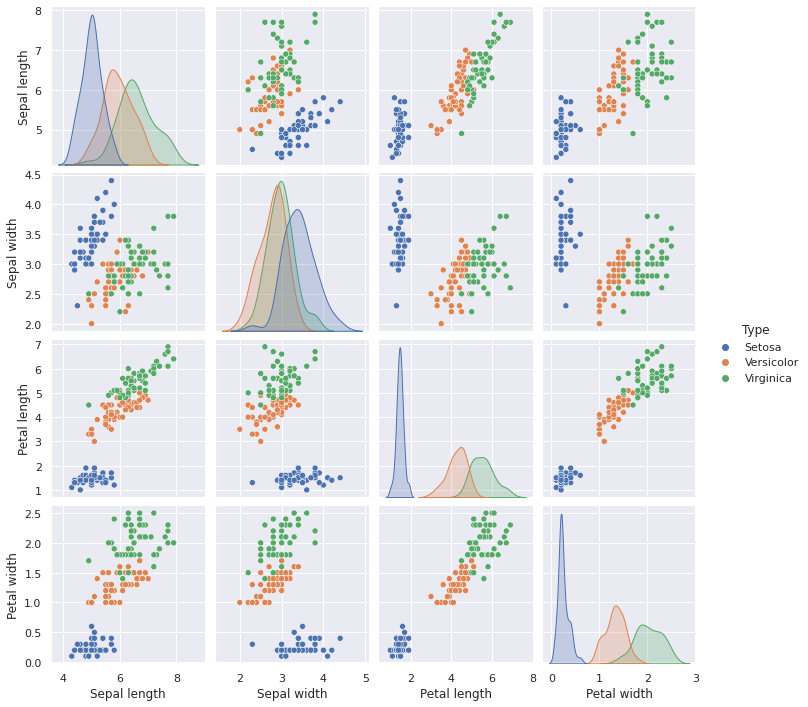

In [54]:
sns.pairplot(df.dropna(), hue ='Type')

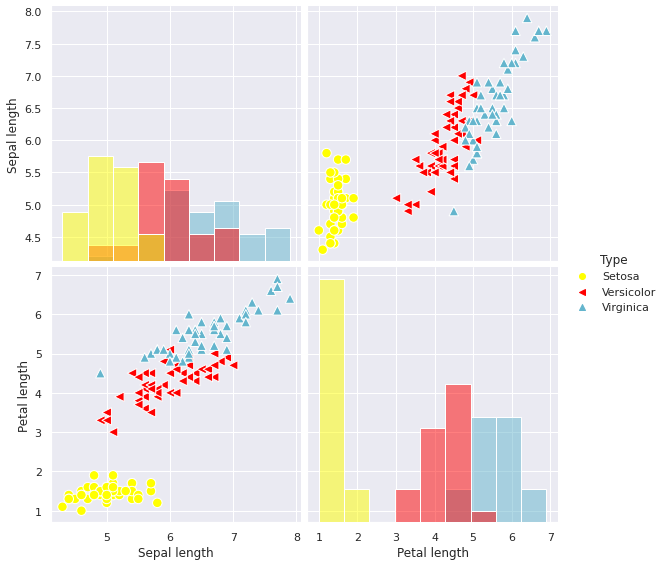

In [56]:
sns.pairplot(df.dropna(),
             vars = ['Sepal length', 'Petal length'],
             hue = 'Type',
             diag_kind = 'hist',
             markers = ['o', '<', '^'],
             size = 4,
             palette = ['yellow', 'red', 'c'],
             plot_kws = dict(s = 90, linewidth =1))